
# Part A - Logistic regression

Here you will load a new dataset, and perform a similar analysis as before, but with a logistic regression rather than a linear regression. You should be able to use most of the code from the Week 2 Practical, except for a few changes.

Please consult the documentation for the Logistic Regression function on sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

__________________________

**0.** Run this cell to style your plots!

For more: https://seaborn.pydata.org/tutorial/aesthetics.html

In [2]:
import seaborn as sns
sns.set('talk')
sns.set_style('ticks')

**1.** Load the file `marks.csv` using the python `pandas` library.

In [3]:
import pandas as pd

df = pd.read_csv('marks.csv')

# Display the first few rows of the dataframe to check if it loaded correctly
print(df.head())

   Module 1  Module 2  Work Experience  Admitted
0        94        82                5         1
1        69        67                2         0
2        85        67                2         0
3        78        67                3         0
4        91        92                5         1


**2.** Make a scatterplot with the `Module 1` and the `Admitted` columns.

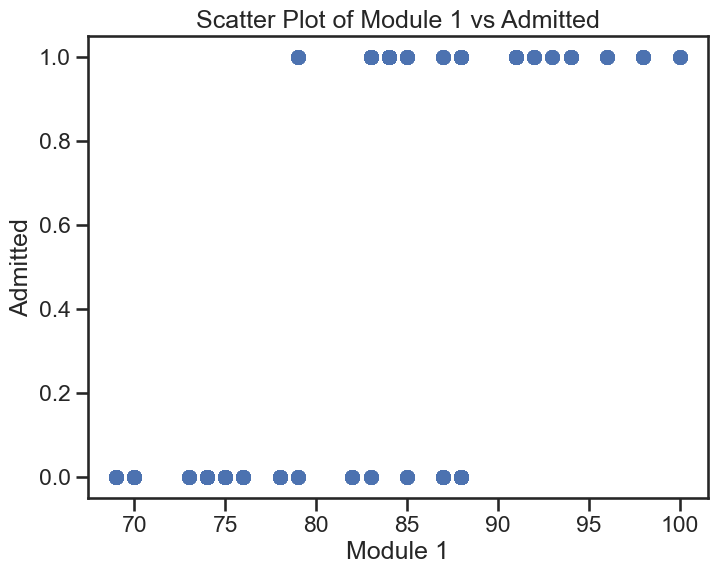

In [4]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Module 1'], df['Admitted'], color='b')

# Adding labels and title
plt.title('Scatter Plot of Module 1 vs Admitted')
plt.xlabel('Module 1')
plt.ylabel('Admitted')

# Show plot
plt.show()

**3.** Create two variables, `X` and `y`. For `y`, use the `Admitted` column. For `X`, use the `Module 1` and `Module 2` columns.

In [5]:
# Your answer here
# Create variables X and y
X = df[['Module 1', 'Module 2']]
y = df['Admitted']

**4.** Import the `train_test_split` tool, and split the data into training/testing sets, 60% for training and 40% for testing, producing `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# Your answer here
!pip install scikit-learn
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # random_state for reproducibility

# Now X_train, X_test, y_train, and y_test are ready to be used for training and testing a model.

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 7.7 MB/s eta 0:00:00 0:00:01


**5.** Import the `LogisticRegression` function, and fit the logistic regression to `X_train` and `y_train`.

In [8]:
# Your answer here
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# The model is now trained and can be used to make predictions or evaluate its performance

LogisticRegression()

**6.** Predict the values for the `Admission` column based on `X_test`. Store that in a new variable `y_pred`.

In [9]:
# Your answer here
y_pred = log_reg.predict(X_test)

**7.** Using the code below, plot the confusion matrix for this classifier.

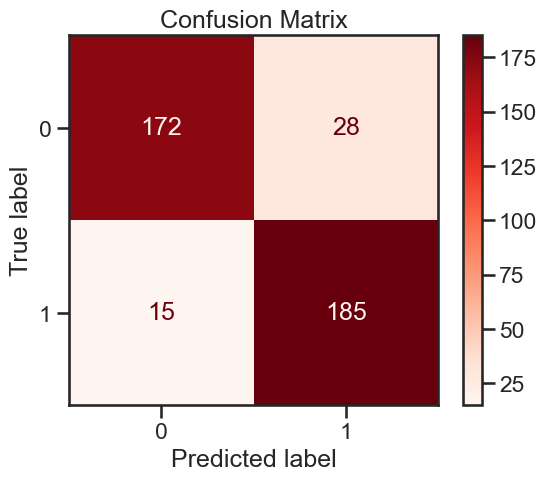

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Calculate confusion matrix
cm = confusion_matrix(y_test, log_reg.predict(X_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')  # Change cmap to 'Greens' or 'Blues' if preferred
plt.title('Confusion Matrix')
plt.show()

**8.** Using the `.score()` method, print the mean accuracy of this classifier model.

In [12]:
# Your answer here

# Calculate the mean accuracy of the logistic regression model
accuracy = log_reg.score(X_test, y_test)

# Print the mean accuracy
print("Mean accuracy of the classifier model:", accuracy)

Mean accuracy of the classifier model: 0.8925


_______________

# Part B - Perceptron

**1.** Import the numpy, pandas and matplotlib libraries:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2.** Create two circular “blobs” of datapoints:

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2)

**3.** Make a scatterplot for the generated dataset, `X`, and its class labels, `y`, using the `scatter()` function in matplotlib:
https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html

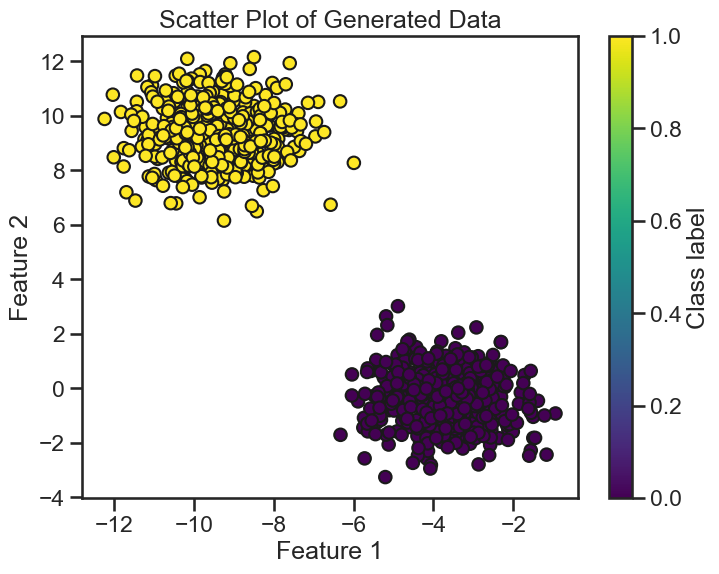

In [15]:
# Your answer here
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')  # Color by class, using 'viridis' colormap

plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class label')  # Adds a color bar to show class labels
plt.show()

**4.** Using the `train_test_split` tool, split the data into training/testing sets, 80% for training and 20% for testing, producing `X_train`, `X_test`, `y_train`, and `y_test`.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

# Now X_train, X_test, y_train, and y_test are ready to be used for training and testing a model.


**5.** Import the `Perceptron` function and create a Perceptron with the parameters:
- 40 iterations (also known as epochs) over the data
- a learning rate of 0.1

For more detail, see the documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [18]:
from sklearn.linear_model import Perceptron

perc = Perceptron(max_iter=40, eta0=0.1)

**6.** Train the perceptron model by using the `.fit()` method on the training data ( `X_train` and `y_train` ).

In [19]:
# Your answer here
# Train the model
perc.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

**7.** Use the `plot_separation()` function below to plot the line separating both classes.

In [20]:
# You need to run this cell first to tell python to define the plot_separation() function.

def plot_separation(X, y, perceptron):
    
    weights   = perceptron.coef_[0]
    bias      = perceptron.intercept_
    slope     = - weights[0]/weights[1]
    intercept = -bias/weights[1]
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])

    x_line = np.linspace(xmin, xmax)
    y_line = slope * x_line + intercept
    
    fig = plt.figure(figsize=(8,6))
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=10)
    plt.plot(x_line, y_line, c='green', lw=4)
    
    plt.title("Dataset and fitted decision line")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.xlim(xmin-1, xmax+1)
    plt.ylim(ymin-1, ymax+1)
    
    plt.show()

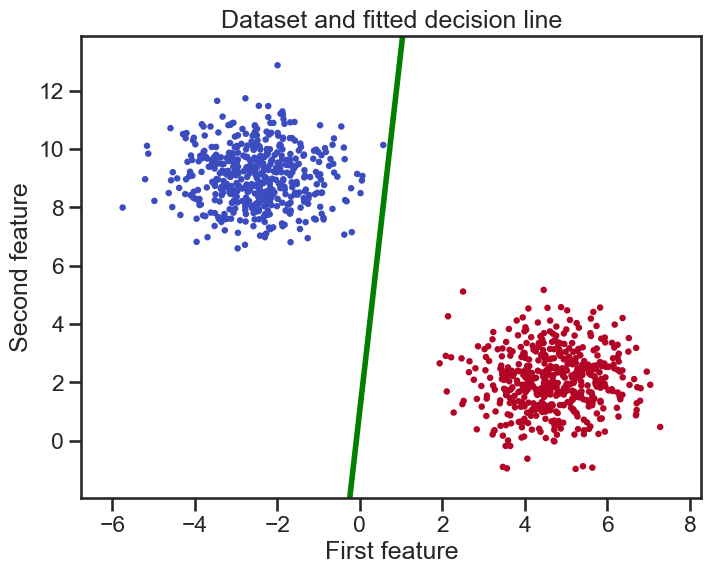

In [21]:
# Above, we have defined the plot_separation function. Now we run it:

plot_separation(X, y, perc)

**8.** Plot the confusion matrix for this classifier, using the `plot_confusion_matrix` tool in the same way as for the logistic regression.

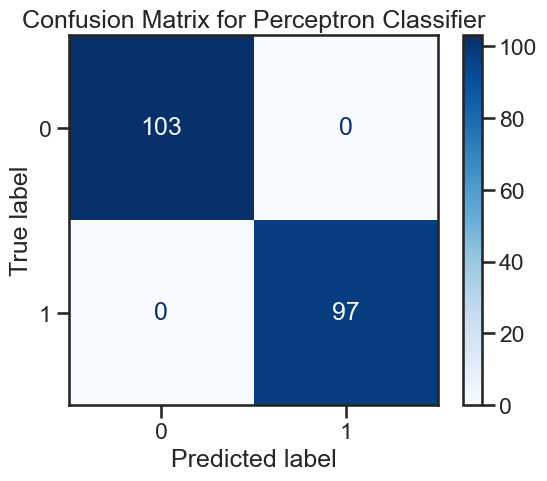

In [22]:
# Your answer here
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'perc' is your trained Perceptron model
# and 'X_test', 'y_test' have been defined from your split

# Predict the test set results
y_pred = perc.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Using 'Blues' as the color map
plt.title('Confusion Matrix for Perceptron Classifier')
plt.show()


**9.** Using the `.score()` method, print the mean accuracy of this classifier model.

In [23]:
# Your answer here
# Calculate the mean accuracy of the Perceptron model on the test data
accuracy = perc.score(X_test, y_test)

# Print the mean accuracy
print("Mean accuracy of the classifier model:", accuracy)

Mean accuracy of the classifier model: 1.0
